In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# oread_csv문자./krx.csv의미한다
# Symbol같은 경우 앞에 0이 들어가 있기 때문에 숫자로 변환되면서 0이 누락되는 것을 방지하기 위함
df = pd.read_csv('krx.csv', dtype={'Symbol':object})
df.shape


def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 ' Linux'로 확인
    
    if system_name == 'Darwin':
        font_family = 'AppleGothic'
    elif system_name == 'Windows':
        font_family = 'Malgun Gothic'
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야 한다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨짐
        !apt-get update -qq
        !apt-get install fonts-nanum -qq > /dev/null
        
        import matplotlib.font_manager as fm
        
        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = 'NanumBarunGothic'
    return font_family

font_family = get_font_family()
# 폰트설정
plt.rc('font', family=font_family)

In [2]:
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingYear'] = df['ListingDate'].dt.year

market_year = df.groupby(['Market', 'ListingYear'])['Symbol'].count()
market_year.unstack().fillna(0).astype(int)

df_market_year = market_year.reset_index()
df_market_year = df_market_year.rename(columns={'Symbol': 'count'})

In [3]:
df['ListingYear'].describe()

count    2458.000000
mean     2005.255899
std        12.769935
min      1956.000000
25%      1999.000000
50%      2007.000000
75%      2016.000000
max      2021.000000
Name: ListingYear, dtype: float64

<AxesSubplot:ylabel='Frequency'>

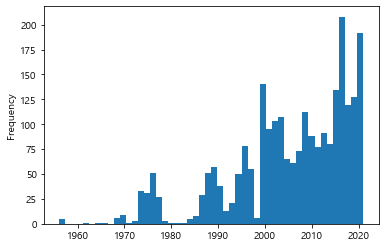

In [5]:
df['ListingYear'].plot.hist(bins=50)

<AxesSubplot:ylabel='Density'>

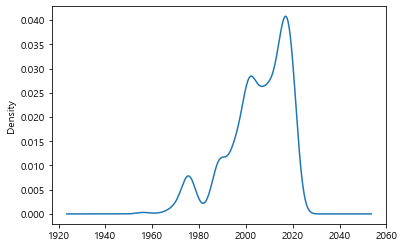

In [7]:
# 밀도
df['ListingYear'].plot.kde()

In [10]:
df[df['Region'] == '케이맨 제도']

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
2095,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
2128,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
4242,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
4500,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
5155,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [11]:
df[(df['ListingYear'] == 2021) & (df['Region'] == '서울특별시') & (df['Market'] == 'KOSPI')]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
84,375500,KOSPI,DL이앤씨,토목 건설업,토목 건설 사업,2021-01-25,12월,마창민,NaN,서울특별시,2021.0
98,383220,KOSPI,F&F,봉제의복 제조업,"MLB, MLB KIDS, DISCOVERY 등 패션의류제품",2021-05-21,12월,김창수,http://www.fnf.co.kr,서울특별시,2021.0
1507,383800,KOSPI,LX홀딩스,기타 금융업,지주회사,2021-05-27,12월,"구본준, 송치호",http://www.lxholdings.co.kr,서울특별시,2021.0
1841,361610,KOSPI,SK아이이테크놀로지,일차전지 및 축전지 제조업,2차전지용 습식 분리막 및 폴더블 커버 윈도우,2021-05-11,12월,노재석,http://www.skietechnology.com/,서울특별시,2021.0
2475,377190,KOSPI,디앤디플랫폼리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2021-08-27,03월,이양원,http://dndplatformreit.com/,서울특별시,2021.0
4484,380440,KOSPI,엔에이치스팩19호,금융 지원 서비스업,기타 금융지원(SPAC),2021-05-21,12월,조선희,NaN,서울특별시,2021.0
4516,097520,KOSPI,엠씨넥스,영상 및 음향기기 제조업,"모바일 카메라모듈,전장 카메라모듈,블랙박스,IP 카메라",2021-07-06,12월,민동욱,http://www.mcnex.co.kr,서울특별시,2021.0
5150,259960,KOSPI,크래프톤,소프트웨어 개발 및 공급업,등 게임 소프트웨어,2021-08-10,12월,김창한,http://www.krafton.com,서울특별시,2021.0


In [14]:
df_sr = pd.crosstab(df['Sector'], df['Region'])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,8,1,0,1,0,11,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


In [20]:
df_sr.loc[
          ['소프트웨어 개발 및 공급업', '금융 지원 서비스업', '의약품 제조업'],
          ['서울특별시', '경기도']
]

Region,서울특별시,경기도
Sector,,
소프트웨어 개발 및 공급업,101,37
금융 지원 서비스업,73,0
의약품 제조업,40,34


<AxesSubplot:title={'center':'소프트웨어 개발 및 공급업 지역별 빈도수'}, ylabel='Region'>

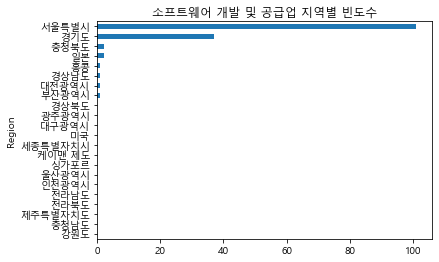

In [24]:
df_sr.loc['소프트웨어 개발 및 공급업'].sort_values().plot.barh(
    title='소프트웨어 개발 및 공급업 지역별 빈도수'
)

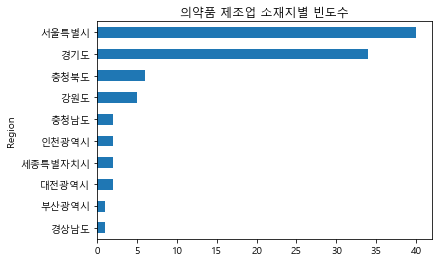

In [28]:
drug = df_sr.loc['의약품 제조업']
d = drug[drug > 0].sort_values().plot.barh(title='의약품 제조업 소재지별 빈도수')

In [31]:
df_sr.iloc[:5, -5:]

Region,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,
1차 비철금속 제조업,0,1,0,0,0
1차 철강 제조업,0,4,0,0,0
가구 제조업,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0
가정용 기기 제조업,0,0,0,0,0
